In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [2]:
raw_df=pd.read_csv('../data/processed/Analysis&Viz.csv')
df=raw_df.copy()

In [3]:
df.head()

,Unnamed: 0,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Diesel,Manual,First,18.20,1199.0,88.70,5,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Diesel,Manual,First,18.20,1199.0,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74


## Detect The Outliers

In [6]:
df.seats.unique()

array([ 5,  7,  8,  4,  6,  2, 10,  9], dtype=int64)

In [7]:
numeric_col=df.select_dtypes('number')
numeric_col_no=len(numeric_col.columns)

C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only b

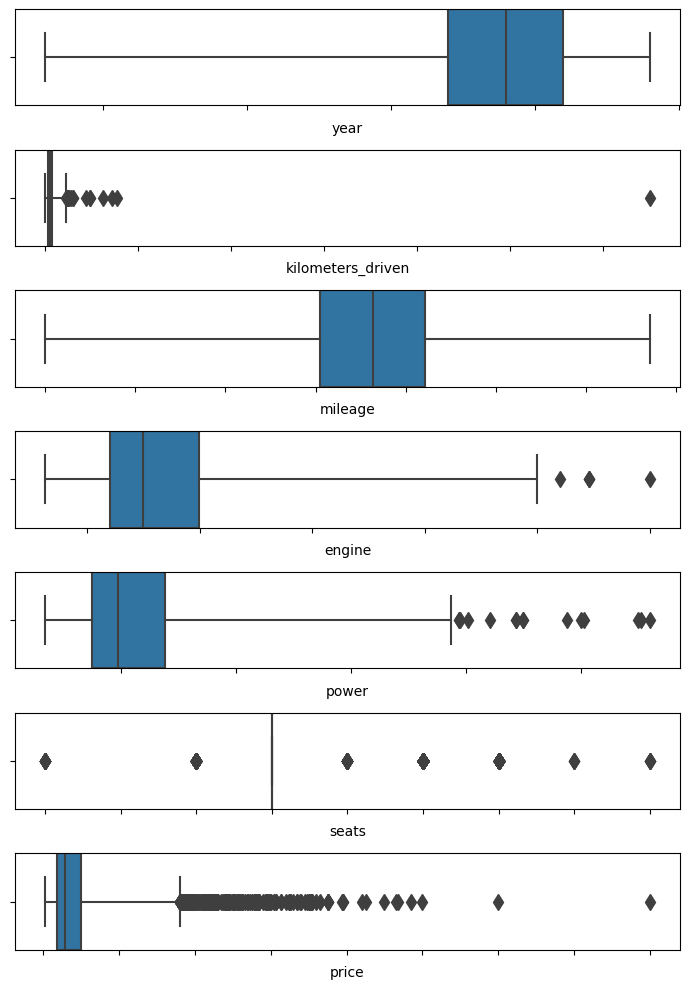

In [8]:
fig, axes = plt.subplots(numeric_col_no, 1, figsize=(numeric_col_no, 10))
for i, col in enumerate(numeric_col):
    figure=sns.boxplot(data=df, x=col, width=1, fliersize=8, whis=4, ax=axes[i])
    figure=axes[i].set_xticklabels([col])
    
plt.tight_layout()
plt.show()

## The Total Number Of Outliers 

In [9]:
out_idx=detect_outliers(df,0,numeric_col)
len(out_idx)

1706

In [18]:
for col in numeric_col:
    idx=detect_outliers(df,0,[col])
    df[col].iloc[idx]=df[col].median()

C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\802589085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[idx]=df[col].median()
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\802589085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[idx]=df[col].median()
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\802589085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[idx]=df[col].median()
C

In [19]:
out_idx=detect_outliers(df,0,numeric_col)
len(out_idx)

0

C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  figure=axes[i].set_xticklabels([col])
C:\Users\mnso\AppData\Local\Temp\ipykernel_12512\80400545.py:4: UserWarning: FixedFormatter should only b

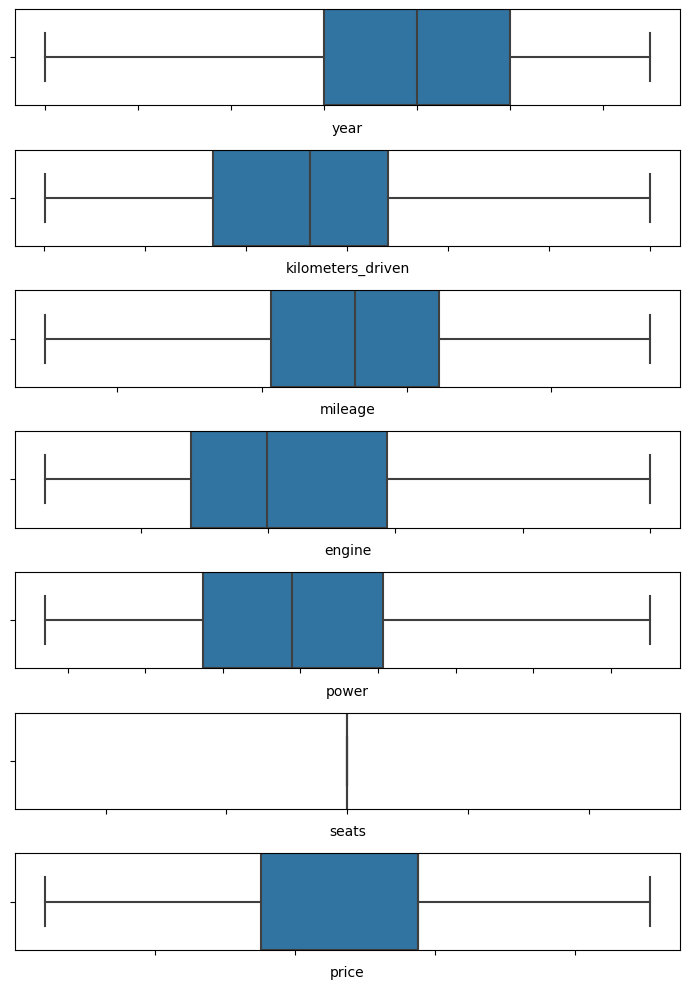

In [20]:
fig, axes = plt.subplots(numeric_col_no, 1, figsize=(numeric_col_no, 10))
for i, col in enumerate(numeric_col):
    figure=sns.boxplot(data=df, x=col, width=1, fliersize=8, whis=4, ax=axes[i])
    figure=axes[i].set_xticklabels([col])
    
plt.tight_layout()
plt.show()

## Convert The Categorical Data

In [21]:
df.drop(['name','mileage','location'],axis=1,inplace=True)

In [22]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['fuel_type', 'transmission', 'owner_type'], dtype='object')

In [23]:
df=pd.get_dummies(df,cat_col,drop_first=True)
df.head()

,year,kilometers_driven,engine,power,seats,price,fuel_type_Diesel,transmission_Manual,owner_type_Fourth & Above,owner_type_Second,owner_type_Third
0,2010,72000.0,998.0,58.16,5,1.75,False,True,False,False,False
1,2015,41000.0,1582.0,126.20,5,5.75,True,True,False,False,False
2,2011,46000.0,1199.0,88.70,5,4.50,True,True,False,False,False
3,2012,87000.0,1248.0,88.76,5,6.00,True,True,False,False,False
4,2013,40670.0,1968.0,140.80,5,5.75,True,False,False,True,False


In [24]:
def replace_bool_with_numbers(df):
    df.replace({False: 0, True: 1}, inplace=True)


df.apply(replace_bool_with_numbers)


year                         None
kilometers_driven            None
engine                       None
power                        None
seats                        None
price                        None
fuel_type_Diesel             None
transmission_Manual          None
owner_type_Fourth & Above    None
owner_type_Second            None
owner_type_Third             None
dtype: object

In [25]:
df.head()

,year,kilometers_driven,engine,power,seats,price,fuel_type_Diesel,transmission_Manual,owner_type_Fourth & Above,owner_type_Second,owner_type_Third
0,2010,72000.0,998.0,58.16,5,1.75,0,1,0,0,0
1,2015,41000.0,1582.0,126.20,5,5.75,1,1,0,0,0
2,2011,46000.0,1199.0,88.70,5,4.50,1,1,0,0,0
3,2012,87000.0,1248.0,88.76,5,6.00,1,1,0,0,0
4,2013,40670.0,1968.0,140.80,5,5.75,1,0,0,1,0


## Makking Train_Test_Split

In [26]:
x=df.drop('price',axis=1)
y=df['price']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [29]:
poly=PolynomialFeatures(degree=4)

x_train_scaled_poly=poly.fit_transform(x_train_scaled)
x_test_scaled_poly=poly.transform(x_test_scaled)

## Makking A Model

In [30]:
model=LinearRegression()

In [31]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [32]:
model.score(x_train_scaled,y_train)

0.43444290700943156

In [33]:
model.score(x_test_scaled,y_test)

0.4798283450040213

In [34]:
model.fit(x_train_scaled_poly,y_train)

LinearRegression()

In [35]:
model.score(x_train_scaled_poly,y_train)

0.6672755986459318

In [36]:
model.score(x_test_scaled_poly,y_test)

-12.484354972426322

# The Suitable Model From Different Accuracies

In [37]:
models={
    'lr':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=5),
    'SVR':SVR()
}

In [38]:
for name,model in models.items():
    print('using:',name)
    model.fit(x_train_scaled,y_train)
    print('train accuracy: ',model.score(x_train_scaled,y_train))
    print('test accuracy: ',model.score(x_test_scaled,y_test))
    print('-'*20)

using: lr
train accuracy:  0.43444290700943156
test accuracy:  0.4798283450040213
--------------------
using: KNN
train accuracy:  0.7589833024947821
test accuracy:  0.6494532158735987
--------------------
using: SVR
train accuracy:  0.6418661814736651
test accuracy:  0.6580821237086345
--------------------


In [39]:
model2=KNeighborsRegressor(n_neighbors=5)

In [40]:
model2.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [41]:
features=x.columns.to_list()
features

['year',
 'kilometers_driven',
 'engine',
 'power',
 'seats',
 'fuel_type_Diesel',
 'transmission_Manual',
 'owner_type_Fourth & Above',
 'owner_type_Second',
 'owner_type_Third']

In [42]:
import joblib

In [43]:
joblib.dump(model,'used_cars_model.h5')
joblib.dump(scaler,'used_cars_scaler.h5')
joblib.dump(features,'used_cars_features.h5')

['used_cars_features.h5']

In [44]:
df.to_csv('../data/processed/Preprocessing&ML.csv')